In [1]:
import numpy as np

In [2]:
import numpy as np
from typing import List, Tuple
import cv2

from cv2 import cvtColor, COLOR_BGR2GRAY, TERM_CRITERIA_EPS, TERM_CRITERIA_MAX_ITER, \
    findChessboardCorners, cornerSubPix, drawChessboardCorners

'''
Please do Not change or add any imports. 
'''

#task1

def findRot_xyz2XYZ(alpha: float, beta: float, gamma: float) -> np.ndarray:
    '''
    Args:
        alpha, beta, gamma: They are the rotation angles along x, y and z axis respectly.
            Note that they are angles, not radians.
    Return:
        A 3x3 numpy array represents the rotation matrix from xyz to XYZ.

    '''
    #rot_xyz2XYZ = np.eye(3).astype(float)

    # Your implementation
    
    rot_xyz2XYZ = np.matmul(rotate_matrix_along_z(gamma), np.matmul(rotate_matrix_along_x(beta), rotate_matrix_along_z(alpha)))

    return rot_xyz2XYZ


def findRot_XYZ2xyz(alpha: float, beta: float, gamma: float) -> np.ndarray:
    '''
    Args:
        alpha, beta, gamma: They are the rotation angles of the 3 step respectly.
            Note that they are angles, not radians.
    Return:
        A 3x3 numpy array represents the rotation matrix from XYZ to xyz.

    '''
    rot_XYZ2xyz = np.eye(3).astype(float)

    # Your implementation
    
    rot_XYZ2xyz = np.matmul(rotate_matrix_along_z(-alpha), np.matmul(rotate_matrix_along_x(-beta), rotate_matrix_along_z(-gamma)))
    
    return rot_XYZ2xyz

"""
If your implementation requires implementing other functions. Please implement all the functions you design under here.
But remember the above "findRot_xyz2XYZ()" and "findRot_XYZ2xyz()" functions are the only 2 function that will be called in task1.py.
"""

# Your functions for task1

def rotate_matrix_along_x(angle):
    radians = np.radians(angle)
    
    rot_x = np.array([[1,0,0],[0, np.cos(radians), -np.sin(radians)],[0, np.sin(radians), np.cos(radians)]])
    
    return rot_x

def rotate_matrix_along_z(angle):
    radians = np.radians(angle)
    
    rot_z = np.array([[np.cos(radians), -np.sin(radians), 0],[np.sin(radians), np.cos(radians),0], [0,0,1]])
    
    return rot_z

In [3]:
rot_xyz2XYZ = findRot_xyz2XYZ(15, 30, 20)
rot_XYZ2xyz = findRot_XYZ2xyz(15, 30, 20)

In [4]:
np.linalg.det(rot_xyz2XYZ)

1.0000000000000002

In [5]:
np.linalg.det(rot_XYZ2xyz)

1.0000000000000002

In [6]:
point = np.array([1,0,0]).T
rot_XYZ2xyz @ rot_xyz2XYZ @ point

array([ 1.00000000e+00,  5.18636045e-17, -7.16247646e-17])

In [7]:
point = np.array([0,1,0]).T
rot_XYZ2xyz @ rot_xyz2XYZ @ point

array([ 5.18636045e-17,  1.00000000e+00, -2.61111665e-17])

In [8]:
point = np.array([0,0,1]).T
rot_XYZ2xyz @ rot_xyz2XYZ @ point

array([-7.16247646e-17, -2.61111665e-17,  1.00000000e+00])

In [9]:
# Test case 1
alpha = 45.0  # Rotation angle along x-axis
beta = 30.0   # Rotation angle along y-axis
gamma = 60.0  # Rotation angle along z-axis

# Calculate the rotation matrix from xyz to XYZ
rot_xyz2XYZ = findRot_xyz2XYZ(alpha, beta, gamma)

# Calculate the rotation matrix from XYZ to xyz
rot_XYZ2xyz = findRot_XYZ2xyz(alpha, beta, gamma)

# Check if the inverse relationship holds true
result = np.allclose(np.matmul(rot_xyz2XYZ, rot_XYZ2xyz), np.eye(3))

print("Test case 1:")
print("Rotation Matrix from xyz to XYZ:")
print(rot_xyz2XYZ)
print("Rotation Matrix from XYZ to xyz:")
print(rot_XYZ2xyz)
print("Inverse Relationship Test Result:", result)
print()

Test case 1:
Rotation Matrix from xyz to XYZ:
[[-0.1767767  -0.88388348  0.4330127 ]
 [ 0.91855865 -0.30618622 -0.25      ]
 [ 0.35355339  0.35355339  0.8660254 ]]
Rotation Matrix from XYZ to xyz:
[[-0.1767767   0.91855865  0.35355339]
 [-0.88388348 -0.30618622  0.35355339]
 [ 0.4330127  -0.25        0.8660254 ]]
Inverse Relationship Test Result: True



In [10]:
# Test case 2
alpha = 90.0  # Rotation angle along x-axis
beta = 90.0   # Rotation angle along y-axis
gamma = 90.0  # Rotation angle along z-axis

# Calculate the rotation matrix from xyz to XYZ
rot_xyz2XYZ = findRot_xyz2XYZ(alpha, beta, gamma)

# Calculate the rotation matrix from XYZ to xyz
rot_XYZ2xyz = findRot_XYZ2xyz(alpha, beta, gamma)

# Check if the inverse relationship holds true
result = np.allclose(np.matmul(rot_xyz2XYZ, rot_XYZ2xyz), np.eye(3))

print("Test case 2:")
print("Rotation Matrix from xyz to XYZ:")
print(rot_xyz2XYZ)
print("Rotation Matrix from XYZ to xyz:")
print(rot_XYZ2xyz)
print("Inverse Relationship Test Result:", result)
print()

Test case 2:
Rotation Matrix from xyz to XYZ:
[[-6.123234e-17 -6.123234e-17  1.000000e+00]
 [ 6.123234e-17 -1.000000e+00 -6.123234e-17]
 [ 1.000000e+00  6.123234e-17  6.123234e-17]]
Rotation Matrix from XYZ to xyz:
[[-6.123234e-17  6.123234e-17  1.000000e+00]
 [-6.123234e-17 -1.000000e+00  6.123234e-17]
 [ 1.000000e+00 -6.123234e-17  6.123234e-17]]
Inverse Relationship Test Result: True



In [11]:
# Test case 3
alpha = 0.0   # Rotation angle along x-axis
beta = 0.0    # Rotation angle along y-axis
gamma = 180.0 # Rotation angle along z-axis

# Calculate the rotation matrix from xyz to XYZ
rot_xyz2XYZ = findRot_xyz2XYZ(alpha, beta, gamma)

# Calculate the rotation matrix from XYZ to xyz
rot_XYZ2xyz = findRot_XYZ2xyz(alpha, beta, gamma)

# Check if the inverse relationship holds true
result = np.allclose(np.matmul(rot_xyz2XYZ, rot_XYZ2xyz), np.eye(3))

print("Test case 3:")
print("Rotation Matrix from xyz to XYZ:")
print(rot_xyz2XYZ)
print("Rotation Matrix from XYZ to xyz:")
print(rot_XYZ2xyz)
print("Inverse Relationship Test Result:", result)

Test case 3:
Rotation Matrix from xyz to XYZ:
[[-1.0000000e+00 -1.2246468e-16  0.0000000e+00]
 [ 1.2246468e-16 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]
Rotation Matrix from XYZ to xyz:
[[-1.0000000e+00  1.2246468e-16  0.0000000e+00]
 [-1.2246468e-16 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]
Inverse Relationship Test Result: True


### Part-2

In [12]:
from typing import List, Tuple
import cv2
import numpy as np
from matplotlib import pyplot as plt
from cv2 import cvtColor, COLOR_BGR2GRAY, TERM_CRITERIA_EPS, TERM_CRITERIA_MAX_ITER, \
    findChessboardCorners, cornerSubPix, drawChessboardCorners

##### Question-1

In [13]:
clr_img = cv2.imread('Geometry/checkboard.png')

In [14]:
def find_corner_img_coord(image: np.ndarray) -> np.ndarray:
    '''
    Args: 
        image: Input image of size MxNx3. M is the height of the image. N is the width of the image. 3 is the channel of the image.
    Return:
        A numpy array of size 32x2 that represents the 32 checkerboard corners' pixel coordinates. 
        The pixel coordinate is defined such that the of top-left corner is (0, 0) and the bottom-right corner of the image is (N, M). 
    '''
    #img_coord = np.zeros([32, 2], dtype=float)

    # Your implementation
    PATTERN = (8,4)
    gray_img = cvtColor(image, COLOR_BGR2GRAY)
    ret, corners = findChessboardCorners(gray_img, PATTERN, None)
    
    criteria = (TERM_CRITERIA_EPS + TERM_CRITERIA_MAX_ITER, 30, 0.001)
    if ret:
        img_coord = cornerSubPix(gray_img, corners, (11,11), (-1,-1), criteria)
        img_coord = img_coord.reshape(32,2)

    return img_coord

def find_corner_world_coord(img_coord: np.ndarray) -> np.ndarray:
    '''
    You can output the world coord manually or through some algorithms you design. Your output should be the same order with img_coord.
    Args: 
        img_coord: The image coordinate of the corners. Note that you do not required to use this as input, 
        as long as your output is in the same order with img_coord.
    Return:
        A numpy array of size 32x3 that represents the 32 checkerboard corners' pixel coordinates. 
        The world coordinate or each point should be in form of (x, y, z). 
        The axis of the world coordinate system are given in the image. The output results should be in milimeters.
    '''
    #world_coord = np.zeros([32, 3], dtype=float)

    # Your implementation
    world_coord = []
    for z_coord in [40,30, 20, 10]:
        for coord in [-30,-20,-10, 0 ,10, 20, 30, 40]:
            if coord < 0:
                coord_point  = [0 ,-coord, z_coord]
            elif coord >=0:
                coord_point = [coord, 0, z_coord]
            world_coord.append(coord_point)
    world_coord = np.array(world_coord)

    return world_coord


def find_intrinsic(img_coord: np.ndarray, world_coord: np.ndarray) -> Tuple[float, float, float, float]:
    '''
    Use the image coordinates and world coordinates of the 32 point to calculate the intrinsic parameters.
    Args: 
        img_coord: The image coordinate of the 32 corners. This is a 32x2 numpy array.
        world_coord: The world coordinate of the 32 corners. This is a 32x3 numpy array.
    Returns:
        fx, fy: Focal length. 
        (cx, cy): Principal point of the camera (in pixel coordinate).
    '''

    #fx: float = 0
    #fy: float = 0
    #cx: float = 0
    #cy: float = 0

    # Your implementation
    P = solving_for_intrinsic_and_extrinsic_matrix(img_coord, world_coord)
    
    #fx = K[0,0]
    #fy = K[1,1]
    
    #cx = K[0,2]
    #cy = K[1,2]
    
    m1 = P[0, :3]
    m2 = P[1, :3]
    m3 = P[2,:3]
    
    
    cx = m1.T @ m3
    cy = m2.T @ m3
    
    fx = np.sqrt(m1.T@m1 - np.square(cx))
    fy = np.sqrt(m2.T@m2 - np.square(cy))
    
    return fx, fy, cx, cy


def find_extrinsic(img_coord: np.ndarray, world_coord: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    '''
    Use the image coordinates, world coordinates of the 32 point and the intrinsic parameters to calculate the extrinsic parameters.
    Args: 
        img_coord: The image coordinate of the 32 corners. This is a 32x2 numpy array.
        world_coord: The world coordinate of the 32 corners. This is a 32x3 numpy array.
    Returns:
        R: The rotation matrix of the extrinsic parameters. It is a 3x3 numpy array.
        T: The translation matrix of the extrinsic parameters. It is a 1-dimensional numpy array with length of 3.
    '''

    #R = np.eye(3).astype(float)
    #T = np.zeros(3, dtype=float)

    # Your implementation
    P = solving_for_intrinsic_and_extrinsic_matrix(img_coord, world_coord)
    
    fx, fy, ox, oy = find_intrinsic(img_coord, world_coord)
    
    r31, r32, r33, tz = P[2]
    
    r11 = (P[0,0] - ox*r31)/fx
    r12 = (P[0,1] - ox*r32)/fx
    r13 = (P[0,2] - ox*r33)/fx
    tx = (P[0,3] - ox*tz)/fx
    
    r21 = (P[1,0] - oy*r31)/fy
    r22 = (P[1,1] - oy*r32)/fy
    r23 = (P[1,2] - oy*r33)/fy
    ty = (P[1,3] - oy*tz)/fy
    
    
    R = np.array([[r11, r12, r13],[r21, r22, r23], [r31, r32, r33]])
    
    t = np.array([tx, ty, tz])
    

    return R, t


"""
If your implementation requires implementing other functions. Please implement all the functions you design under here.
But remember the above 4 functions are the only ones that will be called in task2.py.
"""

# Your functions for task2

def solving_for_intrinsic_and_extrinsic_matrix(img_coord, world_coord):
    A = []
    for idx in range(len(img_coord)):
        x, y = img_coord[idx]
        X,Y,Z = world_coord[idx]
    
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x]
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y]
        A.append(row1)
        A.append(row2)
    
    A = np.array(A)
    
    """
    A = U*S*V.T (SVD)
    A.T*A = (U*S*V.T).T * (U*S*V.T)
    A.T*A = (V.T).T * S.T * U.T * U * S * V.T
    A.T*A = V * S.T * (U.T * U) * S * V.T
    
    as U is unitary matrix U.T*U = I
    
    A.T*A = V * S.T * (I) * S * V.T
    A.T*A = V*(S.T*S)*V.T
    
    As S is a diagnol matrix S.T*S = S^2
    
    A.T*A = V*S^2*V.T
    
    As A.T*A is a square matrix we can do Eigen decomposition.
    
    Q*L*Q.T = V*S^2*V.T
    
    Q = V
    L = S^2
    
    V columns contains Eigen Vectors and V.T rows contain Eigen Vectors.
    As Singular values or in order the last singular values is the minimum and last eigen vector is
    its corresponding vector
    """
    _ , _ ,  Vt = np.linalg.svd(A)
    
    P = Vt[-1].reshape(3,4)
    
    scale_factor = 1/np.sqrt(np.square(P[2,0])+np.square(P[2,1])+np.square(P[2,2]))
    
    
    return scale_factor*P


In [15]:
img_coord = find_corner_img_coord(clr_img)

In [16]:
img_coord.shape

(32, 2)

In [17]:
clr_img2 = cv2.imread('Geometry/checkboard.png')

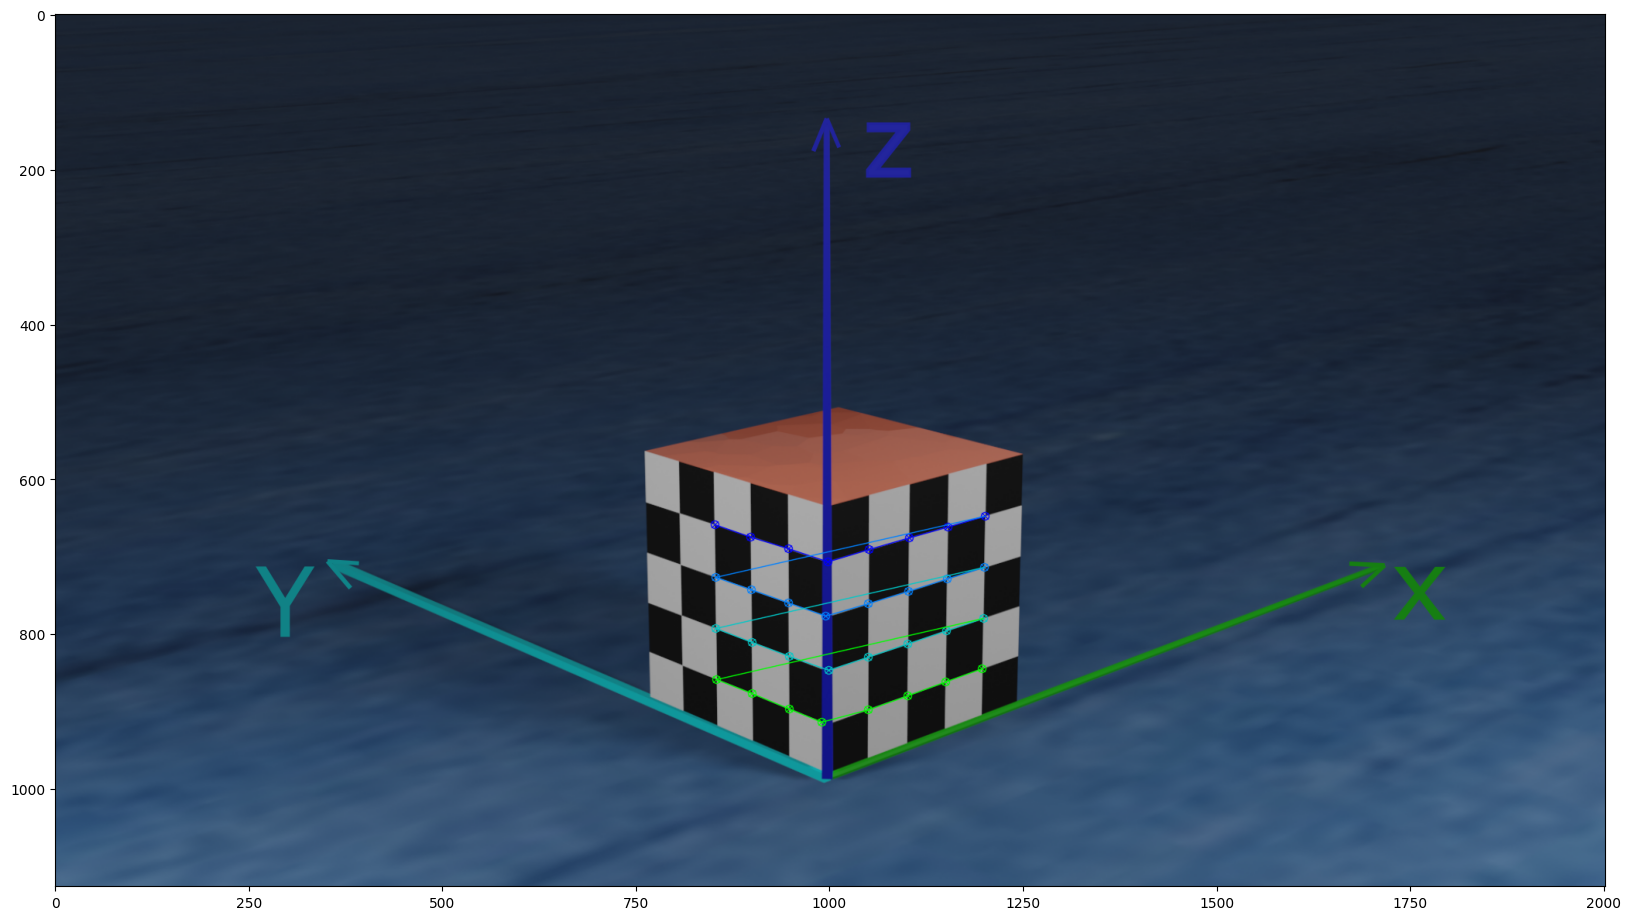

In [18]:
drawChessboardCorners(clr_img, (8,4), img_coord, True)
plt.figure(figsize=(20, 20))
plt.imshow(clr_img)

#### Question 2

In [19]:
world_coord = find_corner_world_coord(img_coord)

In [20]:
world_coord.shape

(32, 3)

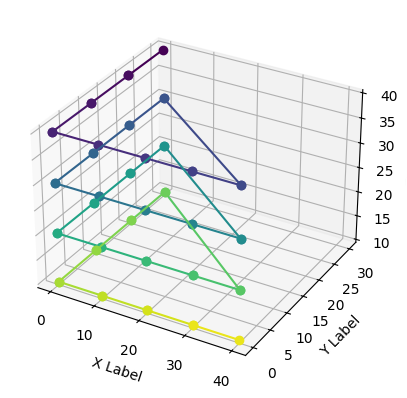

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a list of unique colors for each point
colors = plt.cm.viridis(np.linspace(0, 1, len(world_coord)))

# Scatter plot with different colors for each point
#ax.line(world_coord[:, 0], world_coord[:, 1], world_coord[:, 2], c=colors, marker='o')
for i in range(len(world_coord) - 1):
    ax.plot(world_coord[i:i+2, 0], world_coord[i:i+2, 1], world_coord[i:i+2, 2], color=colors[i], marker='o')

# Customize the plot as needed
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

#### Question 3

In [22]:
fx, fy, ox, oy = find_intrinsic(img_coord, world_coord)

In [23]:
R, t = find_extrinsic(img_coord, world_coord)

In [24]:
R, t

(array([[ 0.70164007, -0.71233878,  0.01657325],
        [-0.18796889, -0.20251006, -0.96107095],
        [ 0.68796871,  0.67121489, -0.27598846]]),
 array([-20.15086751,  50.968734  , 409.87351389]))

In [25]:
M_int = np.array([[fx, 0, ox, 0], [0, fy, oy, 0], [0, 0, 1, 0]])
M_int

array([[2.97401275e+03, 0.00000000e+00, 1.14202411e+03, 0.00000000e+00],
       [0.00000000e+00, 2.97845893e+03, 6.13186506e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [26]:
M_ext = np.row_stack((np.column_stack((R,t)), [0,0,0,1])) 
M_ext

array([[ 7.01640075e-01, -7.12338777e-01,  1.65732453e-02,
        -2.01508675e+01],
       [-1.87968894e-01, -2.02510063e-01, -9.61070949e-01,
         5.09687340e+01],
       [ 6.87968710e-01,  6.71214888e-01, -2.75988455e-01,
         4.09873514e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

##### Verify

In [27]:
P  = solving_for_intrinsic_and_extrinsic_matrix(img_coord, world_coord)

In [28]:
P_tilde = M_int @ M_ext

In [29]:
P_tilde

array([[ 2.87236338e+03, -1.35196102e+03, -2.65896428e+02,
         4.08156499e+05],
       [-1.38004502e+02, -1.91587993e+02, -3.03174275e+03,
         4.03137189e+05],
       [ 6.87968710e-01,  6.71214888e-01, -2.75988455e-01,
         4.09873514e+02]])

In [30]:
Xw = np.column_stack((world_coord, np.ones(32)))

In [31]:
#u_tilde = (P @ Xw.T).T

In [32]:
u_tilde = (P_tilde @ Xw.T).T

In [33]:
(u_tilde/u_tilde[:,2].reshape(-1,1))[:,:2]

array([[ 851.99764086,  659.04375241],
       [ 898.6633997 ,  674.42119934],
       [ 946.87387813,  690.30766711],
       [ 996.70706641,  706.7288553 ],
       [1050.60370108,  691.34332856],
       [1102.7029632 ,  676.47088624],
       [1153.09328772,  662.08628338],
       [1201.85740161,  648.16590444],
       [ 852.72689638,  726.61903065],
       [ 899.09412073,  742.98712183],
       [ 946.98580813,  759.89336362],
       [ 996.47839718,  777.3647396 ],
       [1050.01472623,  760.89348649],
       [1101.77756148,  744.96787529],
       [1151.85359264,  729.56123463],
       [1200.32395005,  714.64860353],
       [ 853.44666917,  793.31560794],
       [ 899.51915097,  810.64713729],
       [ 947.09623513,  828.54466741],
       [ 996.25284948,  847.03638461],
       [1049.43365688,  829.51010939],
       [1100.86437657,  812.56059335],
       [1150.62999862,  796.15982715],
       [1198.81009756,  780.28158619],
       [ 854.15714301,  859.15051257],
       [ 899.93860248,  8

In [34]:
img_coord

array([[ 851.5835 ,  659.17883],
       [ 898.3008 ,  674.5437 ],
       [ 946.78613,  690.46466],
       [ 998.3418 ,  706.52673],
       [1050.7886 ,  691.42847],
       [1102.6189 ,  676.424  ],
       [1152.7625 ,  661.831  ],
       [1201.2312 ,  647.8136 ],
       [ 852.5122 ,  726.52405],
       [ 898.91223,  743.0415 ],
       [ 947.1441 ,  760.21344],
       [ 994.5487 ,  777.08594],
       [1050.4369 ,  761.25195],
       [1101.9634 ,  745.11285],
       [1151.7512 ,  729.48883],
       [1199.9049 ,  714.41644],
       [ 853.46234,  793.1058 ],
       [ 899.6487 ,  810.6749 ],
       [ 947.5425 ,  828.9218 ],
       [ 999.3451 ,  846.848  ],
       [1050.157  ,  830.0341 ],
       [1101.2905 ,  812.80945],
       [1150.7592 ,  796.23737],
       [1198.5859 ,  780.1867 ],
       [ 854.40704,  858.7457 ],
       [ 900.3233 ,  877.4435 ],
       [ 947.82764,  896.7567 ],
       [ 990.14435,  913.75507],
       [1049.7576 ,  897.95496],
       [1100.6151 ,  879.6775 ],
       [11

In [35]:
M_int

array([[2.97401275e+03, 0.00000000e+00, 1.14202411e+03, 0.00000000e+00],
       [0.00000000e+00, 2.97845893e+03, 6.13186506e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [36]:
R.T@R

array([[ 1.00093205e+00,  3.50008595e-05,  2.40847479e-03],
       [ 3.50008595e-05,  9.98966285e-01, -2.42678726e-03],
       [ 2.40847479e-03, -2.42678726e-03,  1.00010167e+00]])

In [37]:
fx, fy, ox, oy

(2974.0127467576153, 2978.4589325825677, 1142.0241122626283, 613.1865063041041)

In [38]:
P_tilde

array([[ 2.87236338e+03, -1.35196102e+03, -2.65896428e+02,
         4.08156499e+05],
       [-1.38004502e+02, -1.91587993e+02, -3.03174275e+03,
         4.03137189e+05],
       [ 6.87968710e-01,  6.71214888e-01, -2.75988455e-01,
         4.09873514e+02]])

In [39]:
P

array([[ 2.87236338e+03, -1.35196102e+03, -2.65896428e+02,
         4.08156499e+05],
       [-1.38004502e+02, -1.91587993e+02, -3.03174275e+03,
         4.03137189e+05],
       [ 6.87968710e-01,  6.71214888e-01, -2.75988455e-01,
         4.09873514e+02]])

In [40]:
findRot_xyz2XYZ(90.98, 30.99, 78.09)

array([[-0.84221   , -0.1919984 ,  0.50380445],
       [ 0.16015533, -0.98135573, -0.10626009],
       [ 0.51481315, -0.00880634,  0.85725718]])

In [41]:
findRot_XYZ2xyz(90.98, 30.99, 78.09)

array([[-0.84221   ,  0.16015533,  0.51481315],
       [-0.1919984 , -0.98135573, -0.00880634],
       [ 0.50380445, -0.10626009,  0.85725718]])